In [1]:
lines = []

with open('uniformity-metrics.txt', 'r') as f:
    lines = f.readlines()


In [3]:
grouped = [lines[i:i+5] for i in range(0, len(lines), 5)]


In [14]:
import pandas as pd

df = pd.read_csv('csvs/metrics_samples_10000.csv')


In [137]:
df

,filename,num_cells,num_characters,num_variables,num_clauses,phi_generation_time,qsampler_time,qsampler_valid_samples,unigen_time,unigen_valid_samples,total_num_solution,percent_qsampler_correct,percent_unigen_correct
0,m5_n5_s1.txt,5,5,20,1200,0.012043,0.777724,25,2.924703,29,1600,0.015625,0.018125
1,m5_n5_s10.txt,5,5,17,816,0.010545,0.839156,211,2.792602,242,242,0.871901,1.000000
2,m5_n5_s100.txt,5,5,15,664,0.011385,2.333910,10,0.096558,0,104,0.096154,0.000000
3,m5_n5_s101.txt,5,5,20,1200,0.018942,0.488652,17,2.727912,37,1468,0.011580,0.025204
4,m5_n5_s102.txt,5,5,17,864,0.012386,7.138692,1,0.046944,0,170,0.005882,0.000000
5,m5_n5_s103.txt,5,5,17,864,0.013000,2.448023,5,2.986632,5,236,0.021186,0.021186
6,m5_n5_s104.txt,5,5,20,1200,0.014108,0.608030,20,3.283782,29,1600,0.012500,0.018125
7,m5_n5_s105.txt,5,5,17,816,0.012309,0.747349,21,2.572815,21,788,0.026650,0.026650
8,m5_n5_s106.txt,5,5,15,624,0.013352,3.929940,1,0.055482,0,168,0.005952,0.000000
9,m5_n5_s107.txt,5,5,17,948,0.015912,1.407499,66,3.098191,68,350,0.188571,0.194286


In [50]:
grouped

[['m5_n5_s1.txt\n',
  '10101010000010010000,10001000000000000000,10001001000010000000,01010000010100101011,00100010000000000000,01000000010000000010,00100010000000010000,00010000000000001001,01010000010100000011,00010000000000000001,00000000000000000000,00000100100000000100,10101010000000000000,00100010001000010000,00000100000001000100,10001001000000000000,01010000000000000011,01000000000000000010,01000000000000100010,00100010001000000000,01010000000000101011,00000100100001000100,01000000010000100010\n',
  '1,2,1,1,2,2,2,1,2,1,4,2,2,3,1,2,3,3,2,1,1,4,1\n',
  '11010101100101001000,11010101100100000000,11010101000001001000,11010101000000000000,11000100100000000000,11000100000001000000,11000100000000000000,10101000000000010101,10001000000010000100,10100000001000010001,11000100100001000000,10000010010000100010,10000000000000000000,10000010000000100010,10000010010000000010,10000010000000000010,10100000000000000001,10010001000100001000,10010001000000001000,10001000000000000000,10001000000000

In [117]:
def get_frequency_distributions(group):
    name = group[0].strip('\n')
    qsampler_samples = group[1]
    qsampler_samples_freq = group[2].strip('\n')
    
    qsampler_samples_freq = [int(x) for x in qsampler_samples_freq.split(',')]
    qsampler_samples_freq = sorted(qsampler_samples_freq, reverse=True)
    
    unigen_samples = group[3]
    unigen_samples_freq = group[4].strip('\n')
    
    unigen_samples_freq = [int(x) for x in unigen_samples_freq.split(',')]
    unigen_samples_freq = sorted(unigen_samples_freq, reverse=True)
    print(len(unigen_samples_freq))
    
    matrix = read_matrix(f'data/5x5/{name}')
    num_sols = df[df['filename'] == name]['total_num_solution'].values[0]
    
    q_sampler_frequencies = [qsampler_samples_freq[x] if x < len(qsampler_samples_freq) else 0 for x in range(num_sols)]
    unigen_frequencies = [unigen_samples_freq[x] if x < len(unigen_samples_freq) else 0 for x in range(num_sols)]
    
    return q_sampler_frequencies, unigen_frequencies
    

In [90]:
q_sampler_frequencies, unigen_frequencies = get_frequency_distributions(grouped[42])


In [91]:
from scipy import stats

stats.chisquare(q_sampler_frequencies)


Power_divergenceResult(statistic=59.384493312174115, pvalue=0.0737986892200995)

In [92]:
stats.chisquare(unigen_frequencies)


Power_divergenceResult(statistic=12.000000000000004, pvalue=0.9999998007332177)

In [93]:
grouped[42]

['m5_n5_s137.txt\n',
 '01111000,11111010,00011000,11000111,01100000,01011000,11111110,10011111,11101111,10000111,01111101,11010111,00111000,10110111,01010000,11100111,01111100,11111001,11011111,00000000,11110111,11001111,01111001,10010111,00100000,11111000,11111111,10100111,10001111,11111100,11111101,01111111,10111111,10101111,00110000,01111011,01000000,01110000,00010000,01101000,00101000,01001000,00001000,01111110,01111010,11111011\n',
 '132,90,92,94,87,104,90,105,110,94,90,97,106,99,91,99,99,90,109,80,102,104,90,94,80,99,132,94,94,99,90,90,111,104,91,90,80,105,80,98,89,87,80,90,90,90\n',
 '11111111,11111110,11111101,11111011,11011110,11101001,11011010,11011000,11010000,11111001,11000110,11101101,11001110,11000000,11010100,11110001,11001000,11011100,11001100,11001010,11000100,11011111,11010110,11010010,11100001,11100011,11000010,11100101,11100111,11101011,11110011,11101111,11110101,11110111\n',
 '1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1\n']

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [95]:
pvalues = []

for group in grouped:
    try:
        q_sampler_frequencies, unigen_frequencies = get_frequency_distributions(group)
        pvalues.append(stats.chisquare(unigen_frequencies).pvalue)
#         print(f'quicksampler: {stats.chisquare(q_sampler_frequencies)}')
    except:
        pass

In [96]:
stats.combine_pvalues(pvalues)

(77.6093207389636, 1.0)

In [114]:
pvalues = []

for group in grouped:
    try:
        q_sampler_frequencies, unigen_frequencies = get_frequency_distributions(group)
        pvalues.append(stats.chisquare(q_sampler_frequencies).pvalue)
#         print(f'quicksampler: {stats.chisquare(q_sampler_frequencies)}')
    except:
        pass

In [115]:
stats.combine_pvalues(pvalues)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:5227: RuntimeWarning: divide by zero encountered in log
  Xsq = -2 * np.sum(np.log(pvalues))


(inf, 0.0)

56


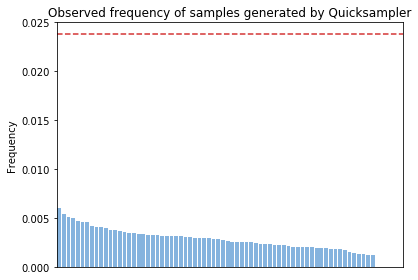

In [138]:
import matplotlib.ticker as ticker

q_sampler_frequencies, unigen_frequencies = get_frequency_distributions(grouped[11])

g = sns.barplot(x=[x for x in range(len(q_sampler_frequencies))], y=[freq / 10000 for freq in q_sampler_frequencies], color='#76B3ED')
g.set(xticks=[])
ax1 = g.axes

ax1.axhline(0.0238, ls='--', color='#D43333')

plt.title('Observed frequency of samples generated by Quicksampler')
plt.ylabel('Frequency')
plt.tight_layout()

g.figure.savefig("figures/quicksampler_uniformity.png", dpi=1200)

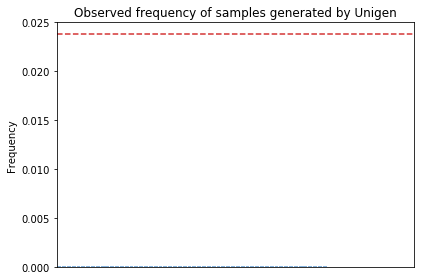

In [139]:
import matplotlib.ticker as ticker

g = sns.barplot(x=[x for x in range(len(unigen_frequencies))], y=[freq / 10000 for freq in unigen_frequencies], color='#76B3ED')
g.set(xticks=[])
ax1 = g.axes

ax1.axhline(0.0238, ls='--', color='#D43333')
plt.title('Observed frequency of samples generated by Unigen')
plt.ylabel('Frequency')
plt.tight_layout()

g.figure.savefig("figures/unigen_uniformity.png", dpi=1200)

In [123]:
g.figure.savefig("figures/unigen_uniformity.png", dpi=1200)

In [112]:
stats.chisquare(unigen_frequencies).pvalue

0.9999998007332177

In [113]:
stats.chisquare(q_sampler_frequencies).pvalue

0.0737986892200995

In [118]:
q_sampler_frequencies, unigen_frequencies = get_frequency_distributions(grouped[42])


34
